In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
births = pd.read_csv('births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1,F,4046
1,1969,1,1,M,4440
2,1969,1,2,F,4454
3,1969,1,2,M,4548
4,1969,1,3,F,4548


In [4]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


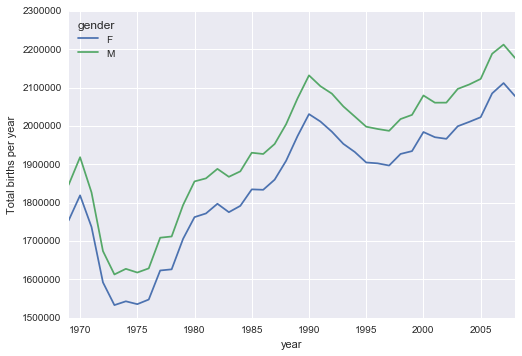

In [5]:
sns.set()
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('Total births per year');

In [7]:
# remove outliers
quartiles = np.percentile(births['births'], [25,50,75])
mu = quartiles[1]  # median
sig = 0.7413 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)') # remove days outside 5 * IQR

# prep data
births['day'] = births['day'].astype(int)
births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')
births['dayofweek'] = births.index.dayofweek

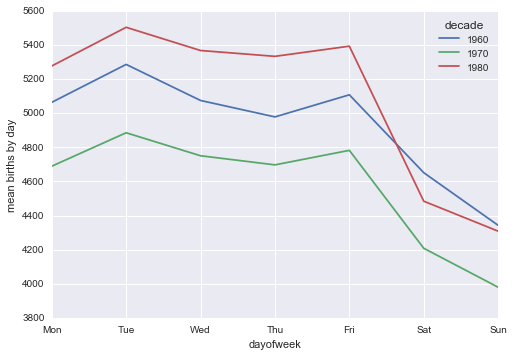

In [8]:
births.pivot_table('births', index='dayofweek', columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');

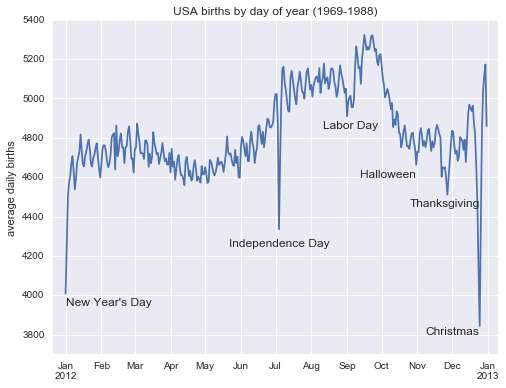

In [11]:
dates = [pd.datetime(2012, month, day)
         for (month, day) in zip(births['month'], births['day'])]

# look at holidays
fig, ax = plt.subplots(figsize=(8,6))
births.pivot_table('births', dates).plot(ax=ax)

# label holidays
ax.text('2012-1-1', 3950, "New Year's Day")
ax.text('2012-7-4', 4250, "Independence Day", ha='center')
ax.text('2012-9-4', 4850, "Labor Day", ha='center')
ax.text('2012-10-31', 4600, "Halloween", ha='right')
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center')
ax.text('2012-12-25', 3800, "Christmas", ha='right')
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births',
       xlim=('2011-12-20', '2013-1-10'),
       ylim=(3700,5400));